# Лабораторная работа №1 - Градиентный спуск и его модификации
М80-114СВ-24

Грушецкий Г.А.

## 1.1 Выбрать тестовые функции оптимизации (2 шт)

Функция Матьяса

Функция Трехгорбого Верблюда

## 1.2 Запрограммировать собственную реализацию классического градиентного спуска

In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(gradient_func, initial_point, learning_rate, max_iterations):
    x = np.array(initial_point, dtype=float) # Преобразуем начальную точку в NumPy array
    iterations = 0
    while iterations < max_iterations:
        gradient = gradient_func(x[0], x[1])
        x = x - learning_rate * gradient # Обновляем точку
        iterations += 1
    return x

## 1.3 Запрограммировать пайлайн тестирования алгоритма оптимизации

### 1.3.1, 1.3.3 Визуализации функции и точки оптимума

In [3]:
from scipy.optimize import minimize
def visualize_optimization(func, optima, bounds, name, num_points=100):
    x =  np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    Z_t = func(*optima)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    # точки оптимума
    if optima is not None:
      for i, optimum in enumerate(bounds):
        z_opt = func(*optimum)
        ax.scatter(optimum[0], optimum[1], z_opt, c='green', marker='o', s=100, label=f'Найденный Оптимум')
    ax.scatter(optima, Z_t, color='orange', s=100, label="Аналитический Оптимум")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(name)
    ax.legend()
    plt.show()

### 1.3.2 Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков

In [4]:
def calculate_points_and_error(optimization_function, gradient, true_optimum, start_points, learning_rate=0.001, iterations=1000):
    true_optimum = np.array(true_optimum)
    found_points = []
    errors = []

    for start in start_points:
        found_optimum = optimization_function(gradient, start, learning_rate, iterations)
        found_points.append(found_optimum)
        error = np.linalg.norm(found_optimum - true_optimum)
        errors.append(error)

    average_error = np.mean(errors)
    return found_points, average_error

## 1.4 Запрограммировать метод вычисления градиента

### Тестовая функция Матьяса

In [5]:
def matyas(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

matyas_optimum = [0, 0]


matyas_start_points =  [[1.,1.], [1.,2.], [1.,-2.]]

def matyas_gradient(x, y):
    grad_x = 0.52*x - 0.48*y
    grad_y = 0.52*y - 0.48*x
    return np.array([grad_x, grad_y])

Визуализация

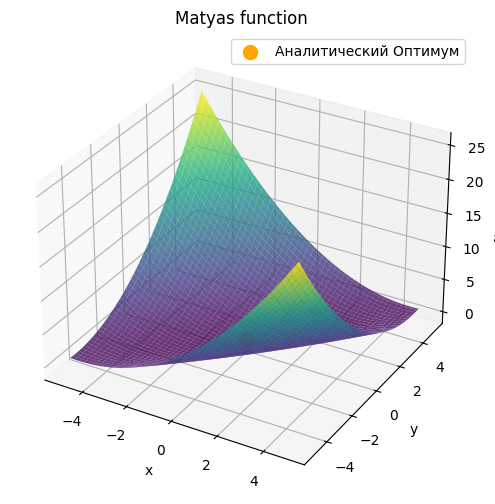

In [6]:
visualize_optimization(matyas, matyas_optimum, [], 'Matyas function')

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:1741: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


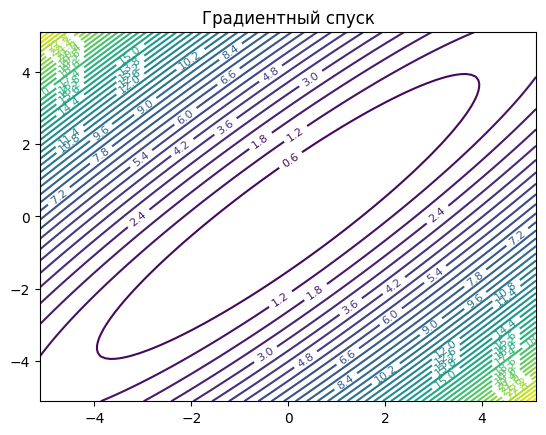

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

def visualize_optimization1(function, optima, bounds, name, history, num_points=100):
    x = np.linspace(-5.12, 5.12, 100)
    y = np.linspace(-5.12, 5.12, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)

    fig, ax = plt.subplots()
    contour = ax.contour(X, Y, Z, levels=50)
    ax.clabel(contour, inline=True, fontsize=8)

    # Анимация
    points = np.array(history)

    #scat = ax.scatter(points[:, 0], points[:, 1], color='red')

    def update(frame):
        scat.set_offsets(points[frame])
        return scat,

    ani = animation.FuncAnimation(fig, update, frames=len(points), interval=200, blit=True)
    plt.title('Градиентный спуск')
    plt.show()
visualize_optimization1(matyas, matyas_optimum, [], 'Matyas function', [])

### Тестовая функция трехгорбого верблюда

In [8]:
def three_hump_camel_function(x, y):
    return (2 * x**2 - 1.05 * x**4 + (x**6) / 6) + (x * y) + (y**2)

three_hump_camel_optimum = [0, 0]

def gradient_three_hump_camel(x, y):
    df_dx = 4 * x - 4.2 * x**3 + (x**5) / 6 + y
    df_dy = x + 2 * y
    return np.array([df_dx, df_dy])

three_hump_camel_start_points =  [[1.,1.], [1.,2.], [1.,-2.]]

Визуализация

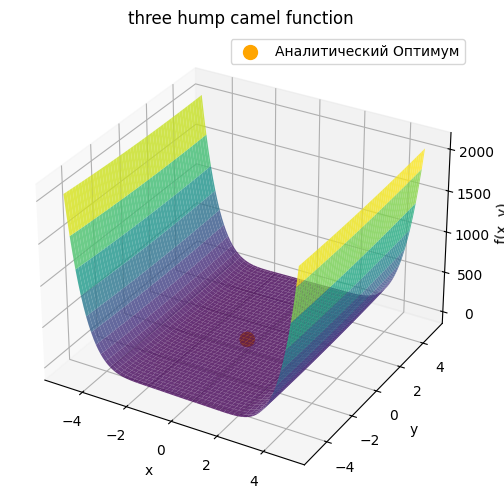

In [9]:
visualize_optimization(three_hump_camel_function, three_hump_camel_optimum, [], 'three hump camel function')

## Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков | Матьяс/Градиентный спуск

In [10]:
matyas_found_points, matyas_average_error = calculate_points_and_error(gradient_descent, matyas_gradient, matyas_optimum, matyas_start_points)

print(f"Погрешность: {matyas_average_error}")

Погрешность: 1.4826016787921248


Визуализация

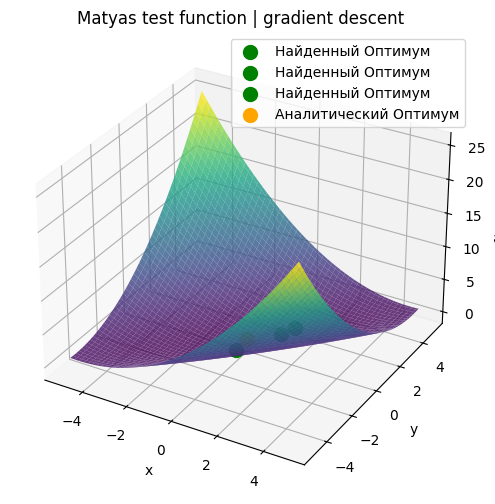

In [11]:
visualize_optimization(matyas, matyas_optimum, matyas_found_points, 'Matyas test function | gradient descent')

## Вычисление погрешности найденного решения в сравнении с аналитическим для нескольких запусков | Трехгорбый верблюд/Градиентный спуск

In [12]:
three_hump_camel_found_points, three_hump_camel_average_error = calculate_points_and_error(gradient_descent, gradient_three_hump_camel, three_hump_camel_optimum, three_hump_camel_start_points)

print(f"Погрешность: {three_hump_camel_average_error}")

Погрешность: 1.9185898918452662


Визуализация

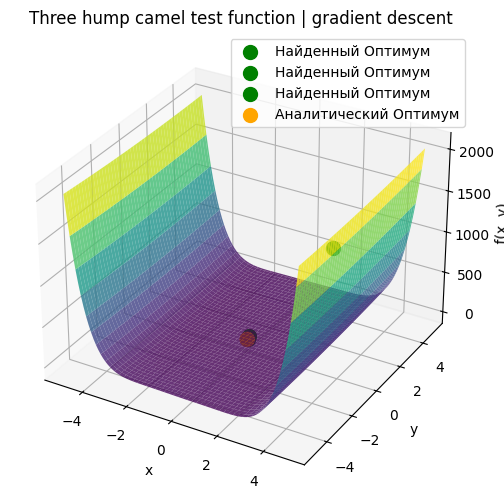

In [13]:
visualize_optimization(three_hump_camel_function, three_hump_camel_optimum, three_hump_camel_found_points, 'Three hump camel test function | gradient descent')

## 1.5 Запрограммировать одну моментную модификацию и протестировать ее

In [14]:
def moment_gradient_descent(gradient_func, initial_point, learning_rate, max_iterations, moment=0.9):
    x = np.array(initial_point, dtype=float) # Преобразуем начальную точку в NumPy array
    iterations = 0
    inertion = np.zeros_like(x)
    while iterations < max_iterations:
        gradient = gradient_func(x[0], x[1])
        inertion = moment * inertion - learning_rate * gradient
        x = x + inertion
        iterations += 1
    return x

### Тест на функции Матьяса

In [15]:
matyas_found_points, matyas_average_error = calculate_points_and_error(moment_gradient_descent, matyas_gradient, matyas_optimum, matyas_start_points)

print(f"Погрешность: {matyas_average_error}")

Погрешность: 0.9499723682895272


Визуализация

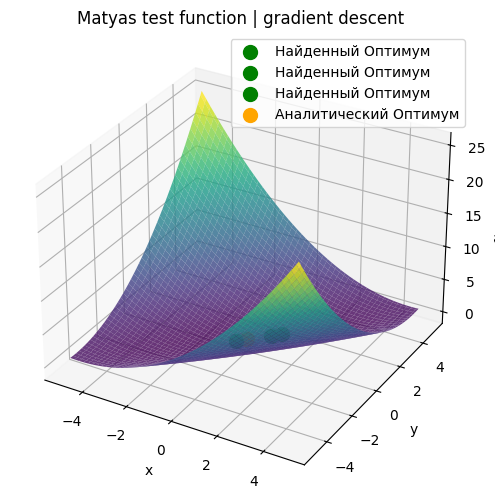

In [16]:
visualize_optimization(matyas, matyas_optimum, matyas_found_points, 'Matyas test function | gradient descent')

### Тест на функции Трехгорбого верблюда

In [17]:
three_hump_camel_found_points, three_hump_camel_average_error = calculate_points_and_error(moment_gradient_descent, gradient_three_hump_camel, three_hump_camel_optimum, three_hump_camel_start_points)

print(f"Погрешность: {three_hump_camel_average_error}")

Погрешность: 1.8385199607389195


Визуализация

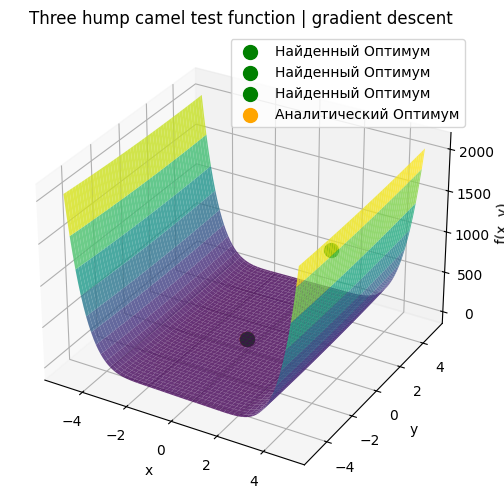

In [18]:
visualize_optimization(three_hump_camel_function, three_hump_camel_optimum, three_hump_camel_found_points, 'Three hump camel test function | gradient descent')

## 1.6 Запрограммировать одну адаптивную модификацию и протестировать ее

In [19]:
def adaptive_gradient_descent(gradient_func, initial_point, learning_rate, max_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = np.array(initial_point, dtype=float)  # Преобразуем начальную точку в NumPy array
    m = np.zeros_like(x)  # Первый момент (среднее значение градиента)
    v = np.zeros_like(x)  # Второй момент (среднее значение квадрата градиента)
    t = 0  # Шаг итерации

    for _ in range(max_iterations):
        t += 1
        gradient = gradient_func(x[0], x[1])  # Вычисляем градиент

        m = beta1 * m + (1 - beta1) * gradient  # Обновляем первый момент
        v = beta2 * v + (1 - beta2) * (gradient ** 2)  # Обновляем второй момент

        m_hat = m / (1 - beta1 ** t)  # Коррекция первого момента
        v_hat = v / (1 - beta2 ** t)  # Коррекция второго момента

        x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Обновляем точку

    return x

### Тест на функции Матьяса

In [20]:
matyas_found_points, matyas_average_error = calculate_points_and_error(adaptive_gradient_descent, matyas_gradient, matyas_optimum, matyas_start_points)

print(f"Погрешность: {matyas_average_error}")

Погрешность: 1.161586863870098


Визуализация

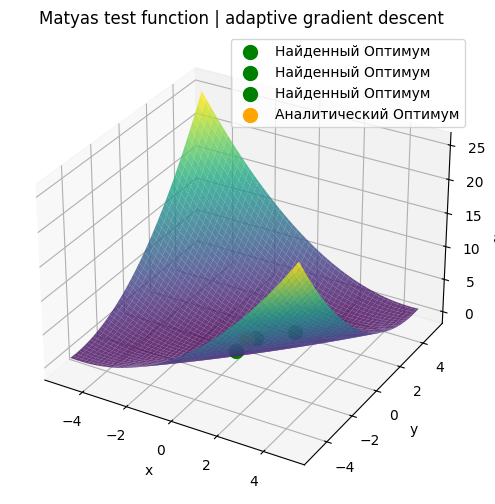

In [21]:
visualize_optimization(matyas, matyas_optimum, matyas_found_points, 'Matyas test function | adaptive gradient descent')

### Тест на функции Трехгорбого верблюда

In [22]:
three_hump_camel_found_points, three_hump_camel_average_error = calculate_points_and_error(adaptive_gradient_descent, gradient_three_hump_camel, three_hump_camel_optimum, three_hump_camel_start_points)

print(f"Погрешность: {three_hump_camel_average_error}")

Погрешность: 1.471617918089584


Визуализация

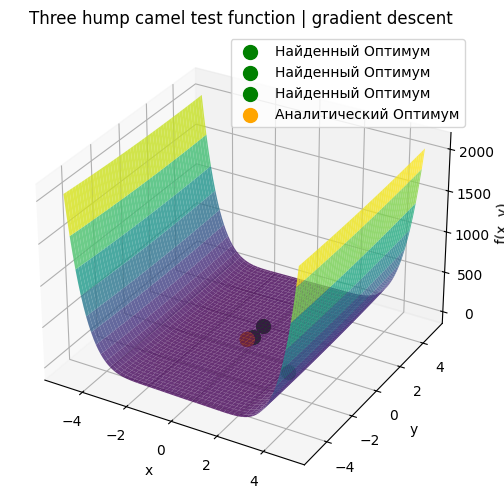

In [23]:
visualize_optimization(three_hump_camel_function, three_hump_camel_optimum, three_hump_camel_found_points, 'Three hump camel test function | gradient descent')

## 1.7 Запрограммировать метод эволюции темпа обучения и протестировать его

In [24]:
def evo_gradient_descent(gradient_func, initial_point, initial_learning_rate, max_iterations, decay_rate=0.01):
    x = np.array(initial_point, dtype=float)  # Преобразуем начальную точку в NumPy array
    learning_rate = initial_learning_rate

    for iteration in range(max_iterations):
        gradient = gradient_func(x[0], x[1])  # Вычисляем градиент
        x = x - learning_rate * gradient  # Обновляем точку
        # Эволюция темпа обучения
        learning_rate = initial_learning_rate / (1 + decay_rate * iteration)

    return x

### Тест на функции Матьяса

In [25]:
matyas_found_points, matyas_average_error = calculate_points_and_error(evo_gradient_descent, matyas_gradient, matyas_optimum, matyas_start_points)

print(f"Погрешность: {matyas_average_error}")

Погрешность: 1.7938832632678483


Визуализация

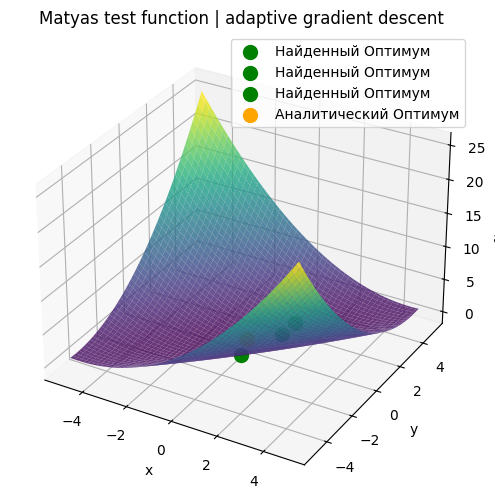

In [26]:
visualize_optimization(matyas, matyas_optimum, matyas_found_points, 'Matyas test function | adaptive gradient descent')

### Тест на функции Трехгорбого верблюда

In [27]:
three_hump_camel_found_points, three_hump_camel_average_error = calculate_points_and_error(evo_gradient_descent, gradient_three_hump_camel, three_hump_camel_optimum, three_hump_camel_start_points)

print(f"Погрешность: {three_hump_camel_average_error}")

Погрешность: 2.382313985927824


Визуализация

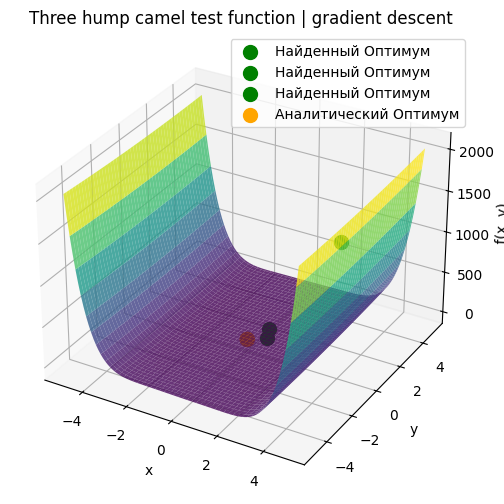

In [28]:
visualize_optimization(three_hump_camel_function, three_hump_camel_optimum, three_hump_camel_found_points, 'Three hump camel test function | gradient descent')

## Вывод

В данной лабораторной работе были

1.   Выбраны две тестовые функции оптимизации.
2.   Запрограммированая собственная реализация классического градиентного спуска.
3.   Запрограммирован пайлайн тестирования алгоритма оптимизации.
4.   Релизован метод вычисления погрешности найденного решения в сравнение с аналитическим для нескольких запусков.
5.   Попытка добавления анимации.
6.   Реализованы методы, реализующие тестовые функции оптимизации Матьяса и Трехгорбого верблюда и протестированы.
7.   Запрограммирована одна моментная модификация и протестирована.
8.   Запрограммирована одна адаптивная модификация и протестирована.
9.   Запрограммирован метод эволюции темпа обучения.



